## Telecom Churn 

# Problem Statement

All over the world, Numerous telecom companies are present. To keep up in the competition and expand their business client have to invest in the market. But, due to increasing competition, company is facing severe loss of revenue and loss of potential customers. So, the client wants to find out the reasons of losing customers by measuring customer loyalty to regain the lost customers. 

## Data Pre Processing

In [1]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 20)
pd.set_option('display.max_rows', 25)
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import f1_score
import statsmodels.api as sm
from sklearn.metrics import precision_score,recall_score
import plotly.offline as py#visualization
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_predict

In [2]:
# Read the datafile
tc = pd.read_csv("E:\\Telecom Churn\\telecom churn.csv")

In [3]:
# Checking the shape of dataset
tc.shape

(3333, 17)

In [4]:
# Checking first five rows of the dataset

tc.head(5)

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day calls  total day charge  \
0             yes                   25.0            110.0             45.07   
1             yes                   26.0            123.0             27.47   
2              no                    0.0            114.0             41.38   
3              no                    0.0             71.0             50.90   
4              no                    0.0            113.0             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0             99.0             16.78               91.0               11.01   
1            103.0             16.62              103.0               11.45   
2            110.0             10.30              104.0                7.32   
3             88.0              5.26               89.0                8.86   
4            122.0             12.61              121.0                8.41   

   total intl calls  total intl charge  customer service calls  churn  
0               3.0               2.70                     1.0  False  
1               3.0               3.70                     1.0  False  
2               5.0               3.29                     0.0  False  
3               7.0               1.78                     2.0  False  
4               3.0               2.73                     3.0  False

In [5]:
# Checking the info of dataset

tc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 17 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3332 non-null   float64
 7   total day calls         3331 non-null   float64
 8   total day charge        3330 non-null   float64
 9   total eve calls         3331 non-null   float64
 10  total eve charge        3329 non-null   float64
 11  total night calls       3330 non-null   float64
 12  total night charge      3332 non-null   float64
 13  total intl calls        3331 non-null   float64
 14  total intl charge       3330 non-null   

In [6]:
# describing the dataset

tc.describe(include='all')

state  account length    area code phone number international plan  \
count   3333     3333.000000  3333.000000         3333               3333   
unique    51             NaN          NaN         3333                  2   
top       WV             NaN          NaN     373-6379                 no   
freq     106             NaN          NaN            1               3010   
mean     NaN      101.064806   437.182418          NaN                NaN   
std      NaN       39.822106    42.371290          NaN                NaN   
min      NaN        1.000000   408.000000          NaN                NaN   
25%      NaN       74.000000   408.000000          NaN                NaN   
50%      NaN      101.000000   415.000000          NaN                NaN   
75%      NaN      127.000000   510.000000          NaN                NaN   
max      NaN      243.000000   510.000000          NaN                NaN   

       voice mail plan  number vmail messages  total day calls  \
count             3333            3332.000000      3331.000000   
unique               2                    NaN              NaN   
top                 no                    NaN              NaN   
freq              2411                    NaN              NaN   
mean               NaN               8.101441       100.423296   
std                NaN              13.689700        20.068540   
min                NaN               0.000000         0.000000   
25%                NaN               0.000000        87.000000   
50%                NaN               0.000000       101.000000   
75%                NaN              20.000000       114.000000   
max                NaN              51.000000       165.000000   

        total day charge  total eve calls  total eve charge  \
count        3330.000000      3331.000000       3329.000000   
unique               NaN              NaN               NaN   
top                  NaN              NaN               NaN   
freq                 NaN              NaN               NaN   
mean           30.561532       100.114380         17.084875   
std             9.260180        19.927643          4.312225   
min             0.000000         0.000000          0.000000   
25%            24.430000        87.000000         14.160000   
50%            30.500000       100.000000         17.110000   
75%            36.785000       114.000000         20.000000   
max            59.640000       170.000000         30.910000   

        total night calls  total night charge  total intl calls  \
count         3330.000000         3332.000000       3331.000000   
unique                NaN                 NaN               NaN   
top                   NaN                 NaN               NaN   
freq                  NaN                 NaN               NaN   
mean           100.101502            9.039874          4.479436   
std             19.574612            2.275994          2.461679   
min             33.000000            1.040000          0.000000   
25%             87.000000            7.520000          3.000000   
50%            100.000000            9.050000          4.000000   
75%            113.000000           10.590000          6.000000   
max            175.000000           17.770000         20.000000   

        total intl charge  customer service calls  churn  
count         3330.000000             3332.000000   3333  
unique                NaN                     NaN      2  
top                   NaN                     NaN  False  
freq                  NaN                     NaN   2850  
mean             2.764598                1.562425    NaN  
std              0.753954                1.315453    NaN  
min              0.000000                0.000000    NaN  
25%              2.300000                1.000000    NaN  
50%              2.780000                1.000000    NaN  
75%              3.270000                2.000000    NaN  
max              5.400000                9.000000    NaN

In [7]:
tc.isna().any()

state                     False
account length            False
area code                 False
phone number              False
international plan        False
voice mail plan           False
number vmail messages      True
total day calls            True
total day charge           True
total eve calls            True
total eve charge           True
total night calls          True
total night charge         True
total intl calls           True
total intl charge          True
customer service calls     True
churn                     False
dtype: bool

In [8]:
# Checking the unique value in the dataset
tc.nunique()

state                       51
account length             212
area code                    3
phone number              3333
international plan           2
voice mail plan              2
number vmail messages       46
total day calls            119
total day charge          1666
total eve calls            123
total eve charge          1440
total night calls          120
total night charge         933
total intl calls            21
total intl charge          162
customer service calls      10
churn                        2
dtype: int64

In [9]:
# checking the missing value in the dataset
tc.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     1
total day calls           2
total day charge          3
total eve calls           2
total eve charge          4
total night calls         3
total night charge        1
total intl calls          2
total intl charge         3
customer service calls    1
churn                     0
dtype: int64

 We can see that there are some missing values in the dataset

In [10]:
# Missing value imputation ( By replacing the missing value with the median )
tc.fillna(tc.median(), inplace=True)

In [11]:
# Checking the missing value again
tc.isnull().sum()


state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day calls           0
total day charge          0
total eve calls           0
total eve charge          0
total night calls         0
total night charge        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

# EDA

In [12]:
#let's identify the Categorical vs Numerical features first in data set
# categorical data
tc_cat = tc.select_dtypes(exclude=["number","float_"])

In [13]:
# numerical dataset
tc_num = tc.select_dtypes(exclude=["bool_", "object_"])

In [14]:
tc_cat.head()

state phone number international plan voice mail plan  churn
0    KS     382-4657                 no             yes  False
1    OH     371-7191                 no             yes  False
2    NJ     358-1921                 no              no  False
3    OH     375-9999                yes              no  False
4    OK     330-6626                yes              no  False

In [15]:
tc_num.head()

account length  area code  number vmail messages  total day calls  \
0             128        415                   25.0            110.0   
1             107        415                   26.0            123.0   
2             137        415                    0.0            114.0   
3              84        408                    0.0             71.0   
4              75        415                    0.0            113.0   

   total day charge  total eve calls  total eve charge  total night calls  \
0             45.07             99.0             16.78               91.0   
1             27.47            103.0             16.62              103.0   
2             41.38            110.0             10.30              104.0   
3             50.90             88.0              5.26               89.0   
4             28.34            122.0             12.61              121.0   

   total night charge  total intl calls  total intl charge  \
0               11.01               3.0               2.70   
1               11.45               3.0               3.70   
2                7.32               5.0               3.29   
3                8.86               7.0               1.78   
4                8.41               3.0               2.73   

   customer service calls  
0                     1.0  
1                     1.0  
2                     0.0  
3                     2.0  
4                     3.0

In [16]:
# Checking correlation
corr_abs = tc.corr().abs()

cor = (corr_abs.where(np.triu(np.ones(corr_abs.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
cor

customer service calls  churn                     0.208970
total day charge        churn                     0.206051
total eve charge        churn                     0.092561
number vmail messages   churn                     0.089728
total intl charge       churn                     0.067702
                                                    ...   
total eve calls         customer service calls    0.002678
                        total night charge        0.002383
area code               number vmail messages     0.001994
number vmail messages   total day charge          0.000855
total night calls       total intl calls          0.000337
Length: 78, dtype: float64

<AxesSubplot:>

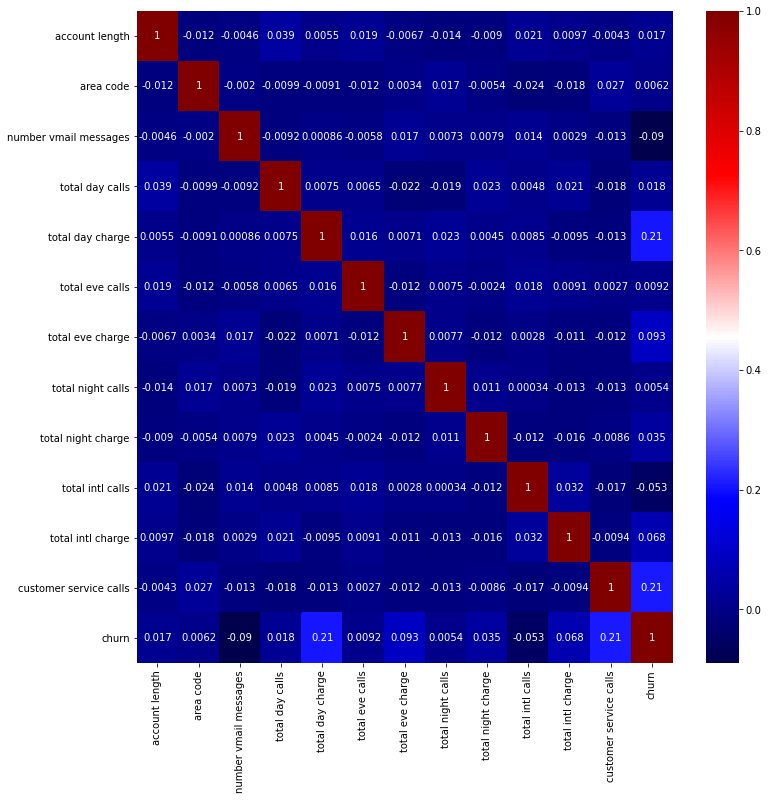

In [17]:
#correlation_heatmap
plt.figure(figsize=(12,12))
sns.heatmap(tc.corr(),annot= True, cmap="seismic")


# Let's plot some plots 

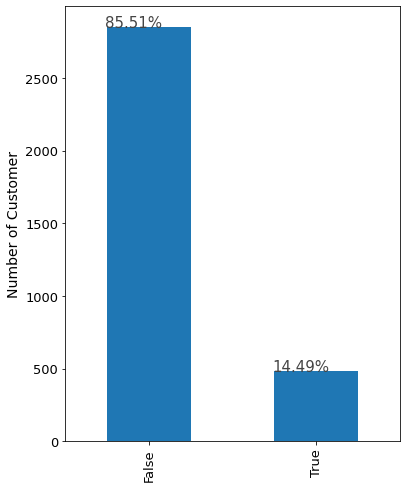

In [18]:
# Checking % of people churning
ax = tc["churn"].value_counts().plot(kind='bar', figsize=(6, 8), fontsize=13)
ax.set_ylabel("Number of Customer", fontsize=14);

totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
            str(round((i.get_height()/total)*100, 2))+'%', fontsize=15,
                color='#444444')
plt.show()

There are 14.49% people who are churning. It means that there are less numbers of people who are churning

voice mail plan  churn
no               False    2008
                 True      403
yes              False     842
                 True       80
Name: churn, dtype: int64


no     2411
yes     922
Name: voice mail plan, dtype: int64

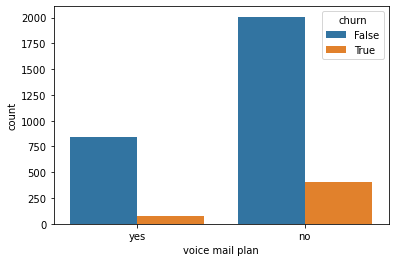

In [19]:
# checking churning wrt voicemail plan
print(tc.groupby('voice mail plan')['churn'].value_counts())

sns.countplot(x = 'voice mail plan' , data = tc, hue= 'churn')
tc['voice mail plan'].value_counts()

It is being oberved that the people who don't have voice mail plan are churning the most.

international plan  churn
no                  False    2664
                    True      346
yes                 False     186
                    True      137
Name: churn, dtype: int64


no     3010
yes     323
Name: international plan, dtype: int64

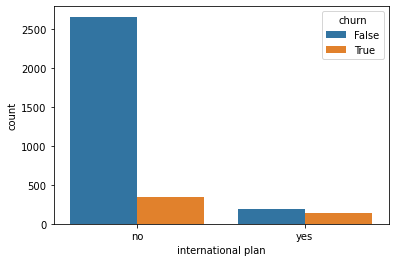

In [20]:
# Checking internation plan wrt churning
print(tc.groupby('international plan')['churn'].value_counts())


sns.countplot(x = 'international plan' , data = tc, hue= 'churn')
tc['international plan'].value_counts()

People who have international plan are churning the most i.e. the % of churning people having international plan is more than 40%

area code  churn
408        False     716
           True      122
415        False    1419
           True      236
510        False     715
           True      125
Name: churn, dtype: int64


415    1655
510     840
408     838
Name: area code, dtype: int64

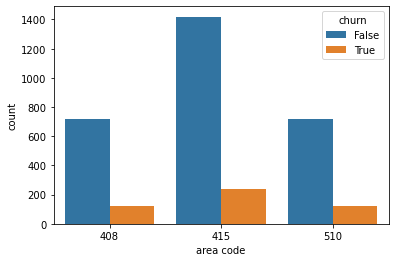

In [21]:
# Checkinhg areawise churning
print(tc.groupby('area code')['churn'].value_counts())
sns.countplot(x = 'area code' , data = tc, hue= 'churn')
tc['area code'].value_counts()

It is observed from above plot that most number of people from area code 415 are churning

customer service calls  churn
0.0                     False     605
                        True       92
1.0                     False    1060
                        True      122
2.0                     False     672
                        True       87
3.0                     False     384
                        True       44
4.0                     False      90
                        True       76
5.0                     True       40
                        False      26
6.0                     True       14
                        False       8
7.0                     True        5
                        False       4
8.0                     False       1
                        True        1
9.0                     True        2
Name: churn, dtype: int64


<AxesSubplot:xlabel='customer service calls', ylabel='count'>

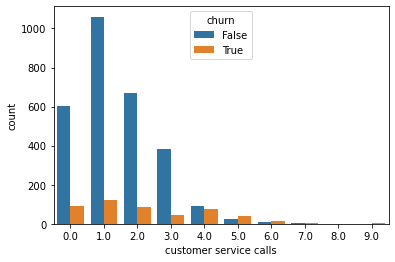

In [22]:
# Checking churning wrt to customer service calls
print(tc.groupby('customer service calls')['churn'].value_counts())

sns.countplot(x = 'customer service calls' , data = tc, hue= 'churn')


It is observed that as the number of customer service calls increases, people are not churning. Assuming customers who are making service calls are satisfied with the service provided post service calls. However the company should priortize solving queries in first two calls itself.

state  churn
AK     False    49
       True      3
AL     False    72
       True      8
AR     False    44
                ..
WI     True      7
WV     False    96
       True     10
WY     False    68
       True      9
Name: churn, Length: 102, dtype: int64


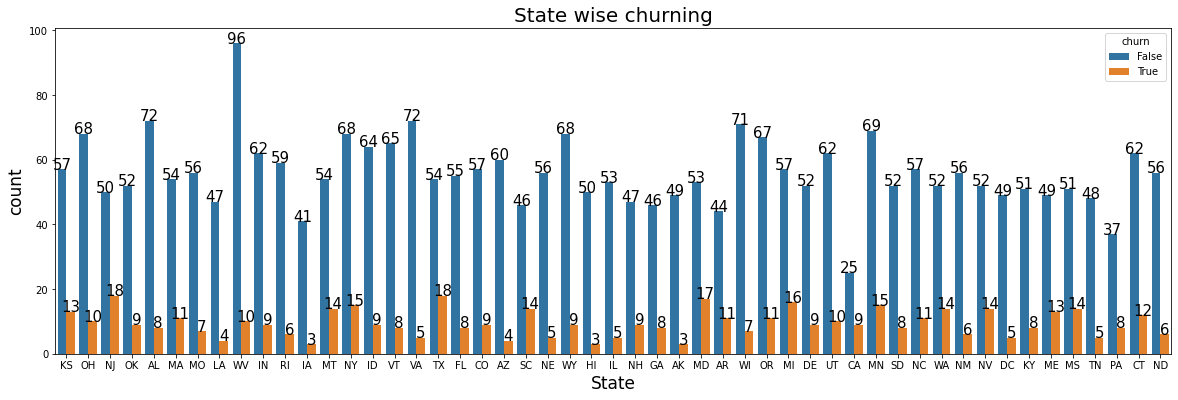

In [23]:
# Checking statewise churning
print(tc.groupby('state')['churn'].value_counts())


plt.figure(figsize = (20,6))
ax = sns.countplot(x = 'state' , data = tc, hue= 'churn')
tc['state'].value_counts()
tc.sort_values('churn',inplace=True)

ax.set_title("State wise churning", fontsize = 20)
plt.xlabel("State",fontsize=17)
plt.ylabel("count", fontsize=17)
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), color='black', size=15, ha="center")
    

From State 'TX', 'NJ', 'CA', the percentage of people churning are high

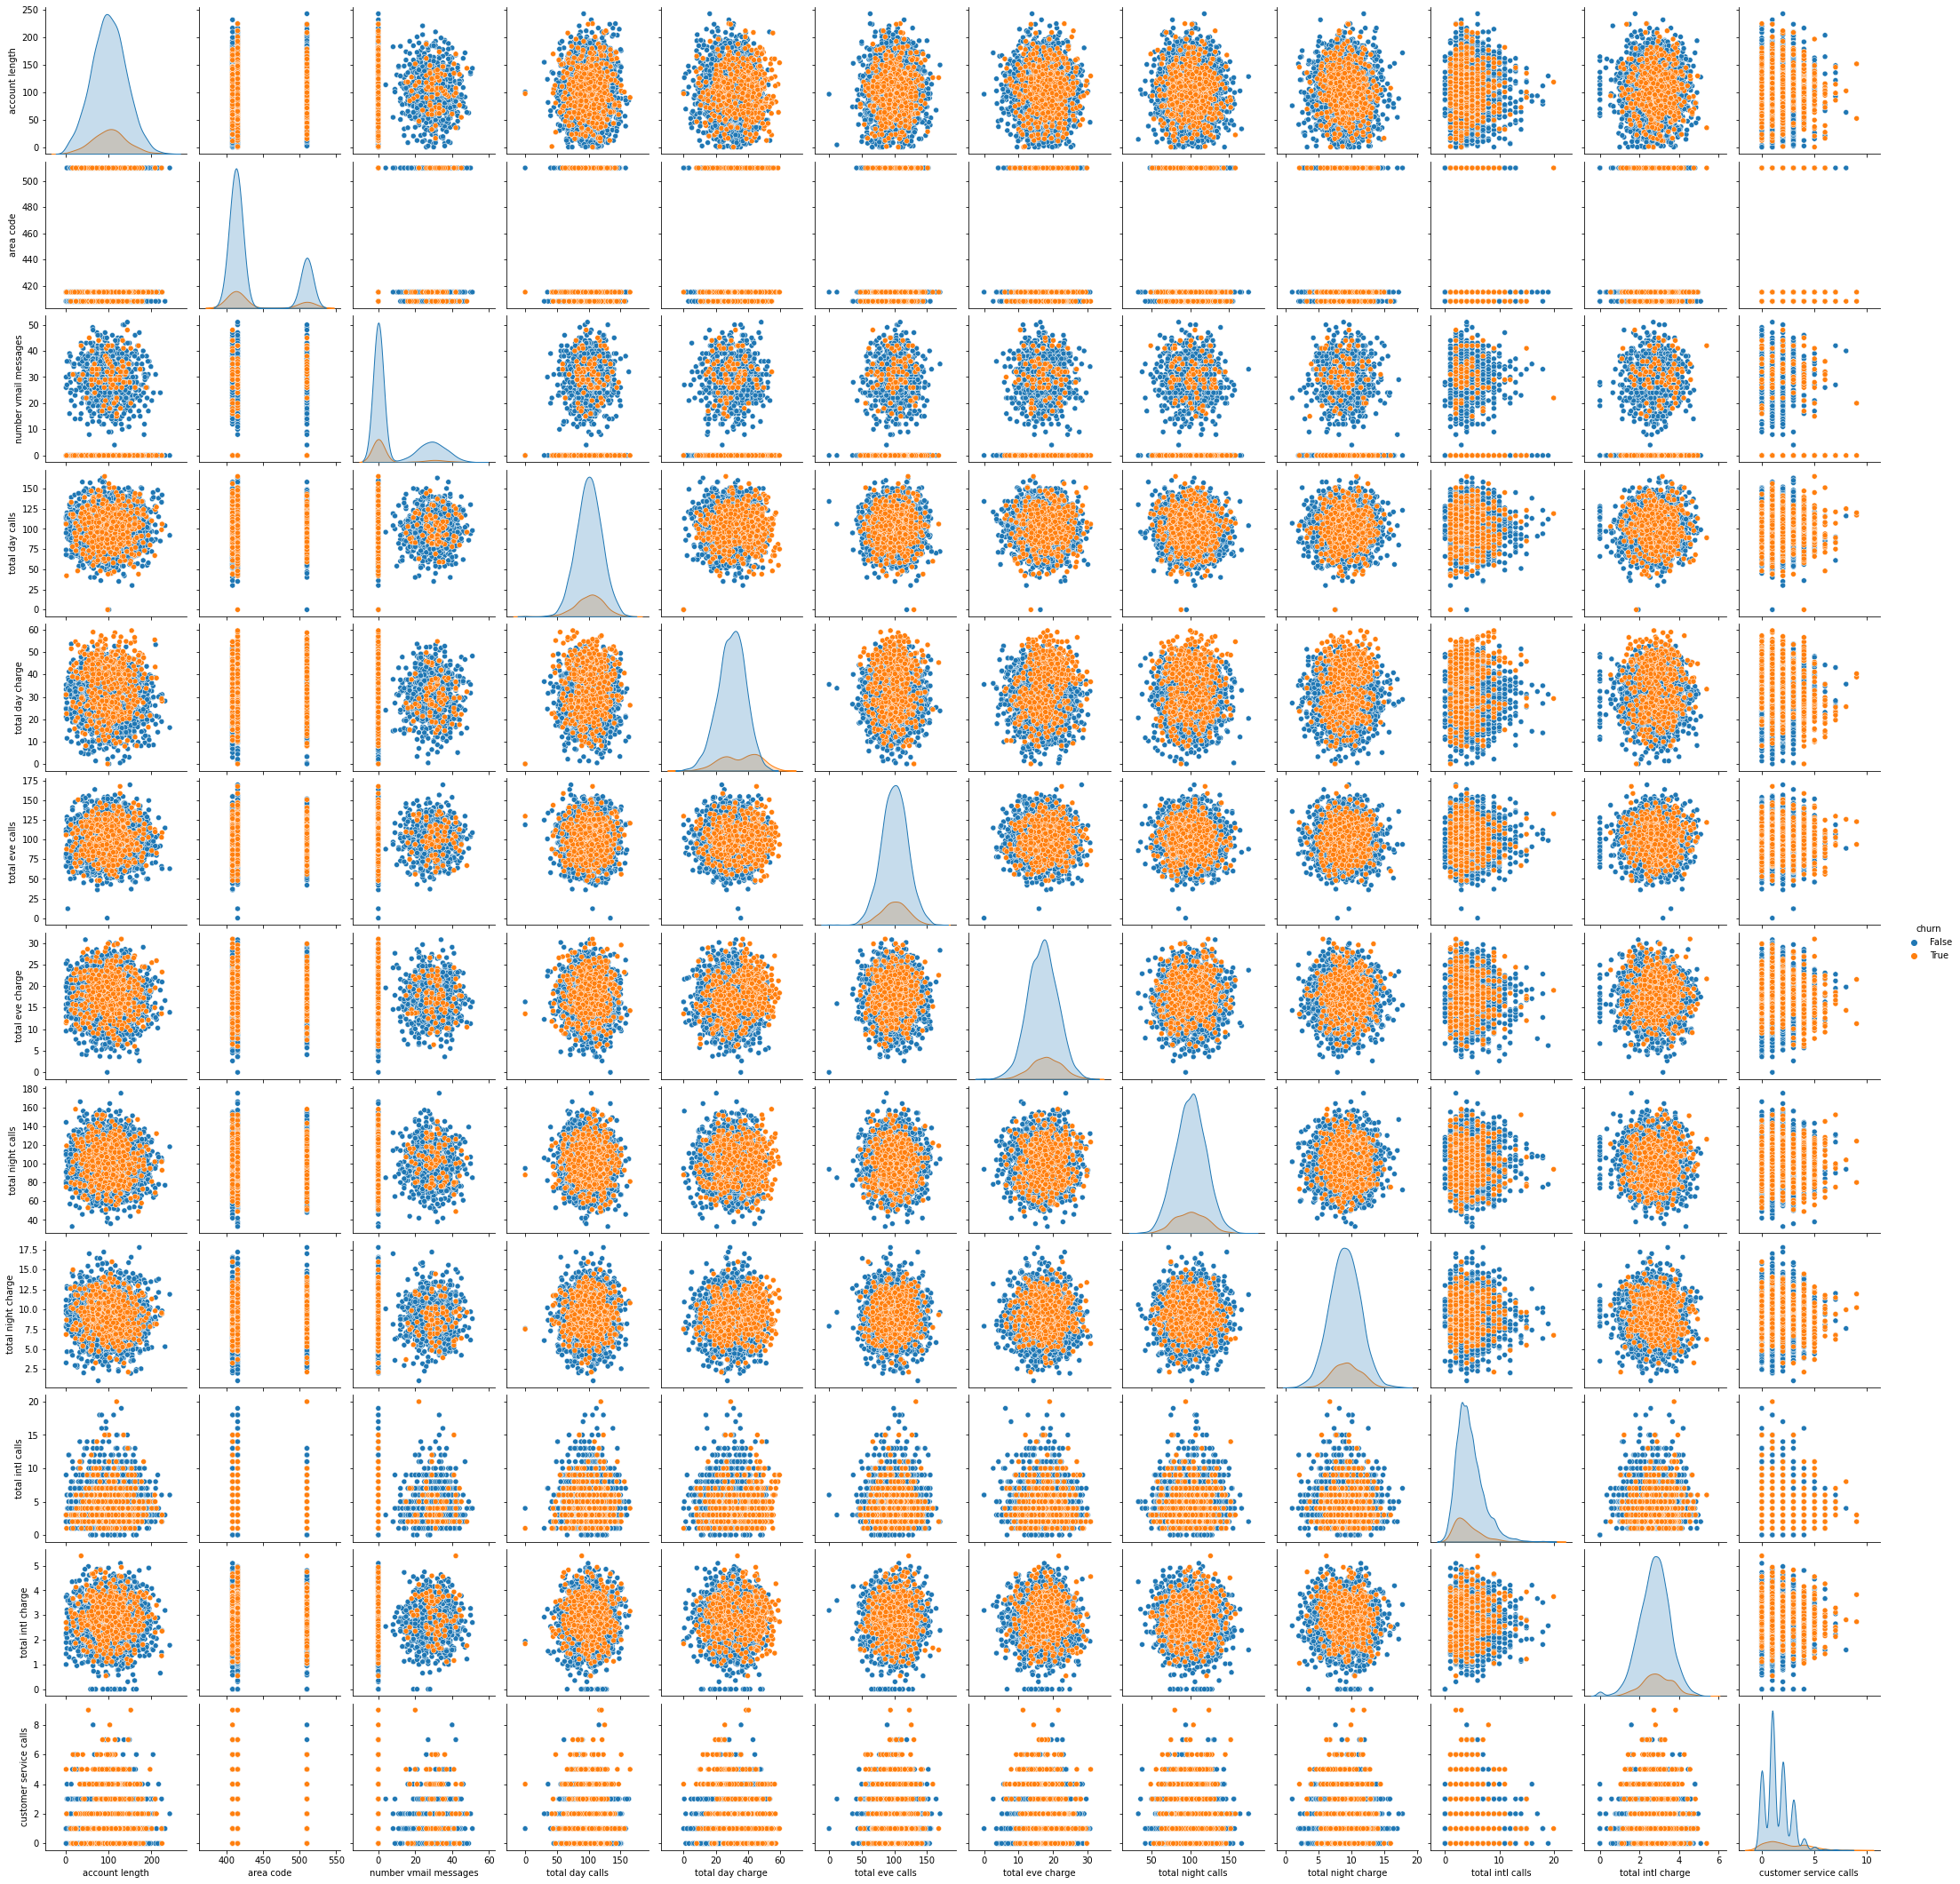

In [24]:
# Plotting the pairplot to check the distribution
sns.pairplot(tc, hue='churn')

<AxesSubplot:xlabel='international plan', ylabel='total intl charge'>

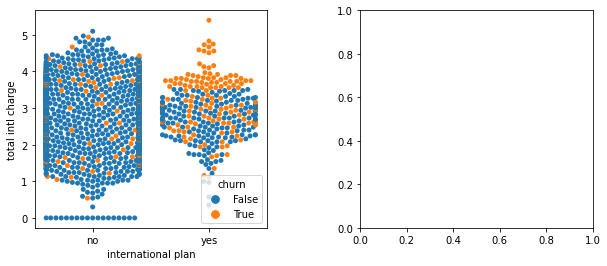

In [25]:
fig, ax = plt.subplots(1,2, figsize=(10, 4))
plt.subplots_adjust(wspace=0.4)
sns.swarmplot(x = 'international plan', y = 'total intl charge', hue="churn", data = tc, ax=ax[0])

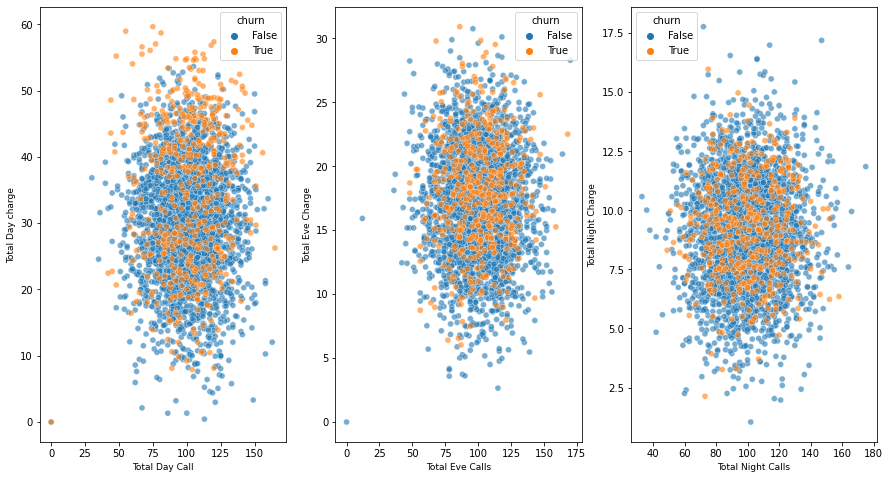

In [26]:
plt.figure(figsize = (15,8))
plt.subplot(1,3,1)
sns.scatterplot(data = tc, x = 'total day calls', y = 'total day charge',
                hue = 'churn', alpha = 0.6)
plt.xlabel('Total Day Call', fontsize = 9)
plt.ylabel('Total Day charge', fontsize = 9)

plt.subplot(1,3,2)
sns.scatterplot(data = tc, x = 'total eve calls', y = 'total eve charge',
                hue = 'churn', alpha = 0.6)
plt.xlabel('Total Eve Calls', fontsize = 9)
plt.ylabel('Total Eve Charge', fontsize = 9)

plt.subplot(1,3,3)
sns.scatterplot(data = tc, x = 'total night calls', y = 'total night charge',
                hue = 'churn', alpha = 0.6)
plt.xlabel('Total Night Calls', fontsize = 9)
plt.ylabel('Total Night Charge', fontsize = 9)

plt.show()

It means there is no fixed charge for the day, eve and night calls with respect to the duration of the call. Like the charges are varying. Some people are charging more for short duration of calls whereas some people are charging less for high duration calls. Charges are not related to the duration of calls.

<Figure size 1080x432 with 0 Axes>

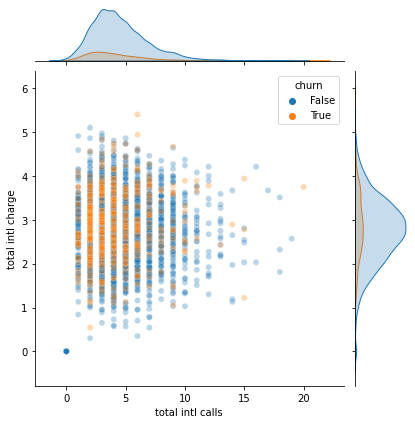

In [27]:
plt.figure(figsize = (15,6))
sns.jointplot(data = tc, x = 'total intl calls', y = 'total intl charge',
                hue = 'churn', alpha = 0.3)
plt.xlabel('Total intl Calls', fontsize = 13)
plt.ylabel('Total intl Charges', fontsize = 13)
plt.show()

# Outlier checking


<AxesSubplot:xlabel='number vmail messages'>

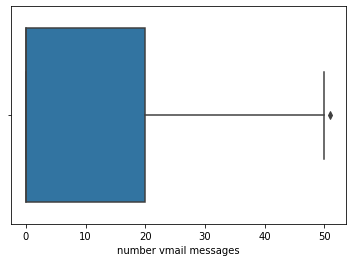

In [28]:
sns.boxplot(tc['number vmail messages'])       

<AxesSubplot:xlabel='total day calls'>

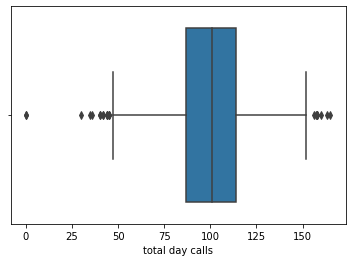

In [29]:
sns.boxplot(tc['total day calls'])

<AxesSubplot:xlabel='total day charge'>

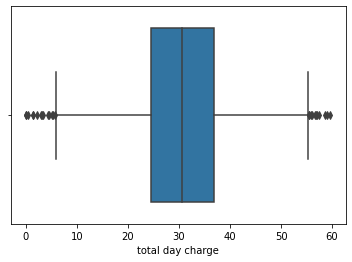

In [30]:
sns.boxplot(tc['total day charge'])

<AxesSubplot:xlabel='total eve calls'>

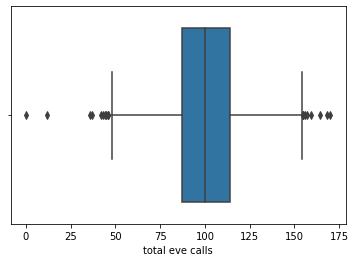

In [31]:
sns.boxplot(tc['total eve calls'])


<AxesSubplot:xlabel='total eve charge'>

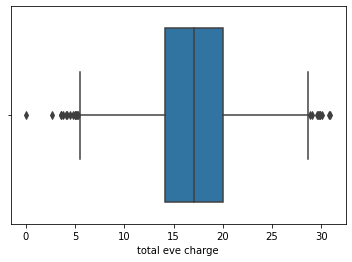

In [32]:
sns.boxplot(tc['total eve charge'])

<AxesSubplot:xlabel='total night calls'>

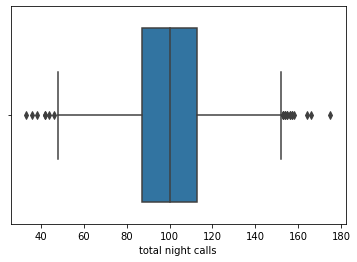

In [33]:
sns.boxplot(tc['total night calls'])

<AxesSubplot:xlabel='total night charge'>

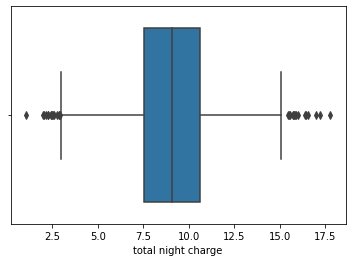

In [34]:
sns.boxplot(tc['total night charge'])

<AxesSubplot:xlabel='total intl calls'>

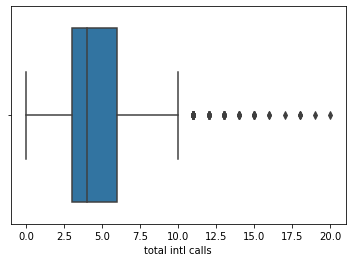

In [35]:
sns.boxplot(tc['total intl calls'])

<AxesSubplot:xlabel='total intl charge'>

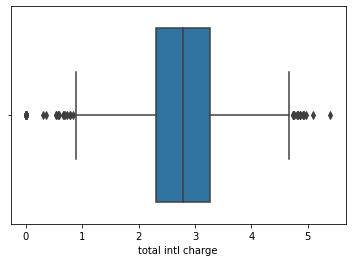

In [36]:
sns.boxplot(tc['total intl charge'])

<AxesSubplot:xlabel='customer service calls'>

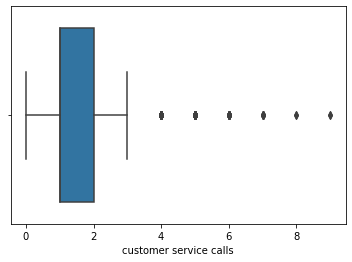

In [37]:
sns.boxplot(tc['customer service calls'])

We can see that there are outliers present in the dataset. So, let's use IQR method to impute them.

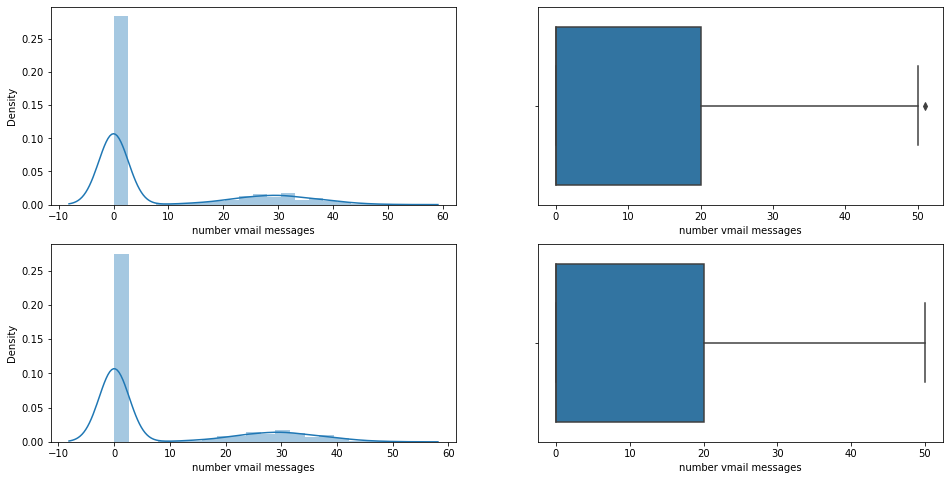

In [38]:
# for number vmail messages

percentile25 = tc['number vmail messages'].quantile(0.25)
percentile75 = tc['number vmail messages'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['number vmail messages'] > upper_limit
tc['number vmail messages'] < lower_limit

# Trimming
new_tc = tc['number vmail messages'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['number vmail messages'] = np.where(
    new_tc['number vmail messages'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['number vmail messages'] < lower_limit,
        lower_limit,
        new_tc['number vmail messages']
    )
)


#comparison plot of number vmail messages
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['number vmail messages'])
plt.subplot(2,2,2)
sns.boxplot(tc['number vmail messages'])
plt.subplot(2,2,3)
sns.distplot(new_tc['number vmail messages'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['number vmail messages'])
plt.show()


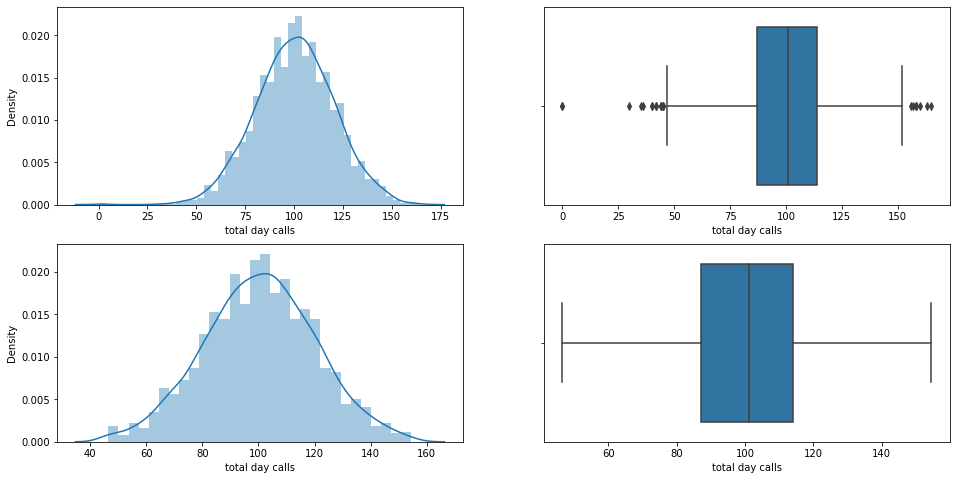

In [39]:
# for 'total day calls'

percentile25 = tc['total day calls'].quantile(0.25)
percentile75 = tc['total day calls'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total day calls'] > upper_limit
tc['total day calls'] < lower_limit

#Trimming
new_tc = tc['total day calls'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['total day calls'] = np.where(
    new_tc['total day calls'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['total day calls'] < lower_limit,
        lower_limit,
        new_tc['total day calls']
    )
)

#comparison plot of 'total day calls'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total day calls'])
plt.subplot(2,2,2)
sns.boxplot(tc['total day calls'])
plt.subplot(2,2,3)
sns.distplot(new_tc['total day calls'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['total day calls'])
plt.show()

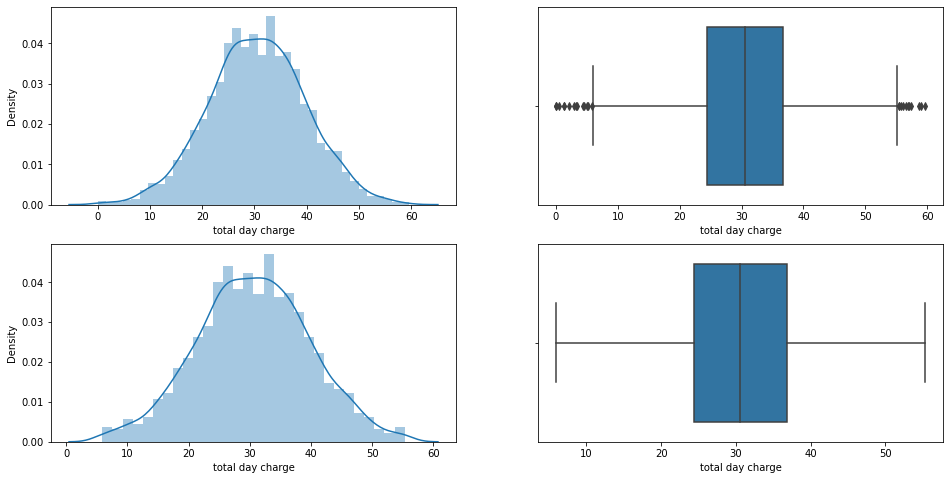

In [40]:
# for 'total day charge'

percentile25 = tc['total day charge'].quantile(0.25)
percentile75 = tc['total day charge'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total day charge'] > upper_limit
tc['total day charge'] < lower_limit

#Trimming
new_tc = tc['total day charge'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['total day charge'] = np.where(
    new_tc['total day charge'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['total day charge'] < lower_limit,
        lower_limit,
        new_tc['total day charge']
    )
)

#comparison plot of 'total day charge'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total day charge'])
plt.subplot(2,2,2)
sns.boxplot(tc['total day charge'])
plt.subplot(2,2,3)
sns.distplot(new_tc['total day charge'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['total day charge'])
plt.show()


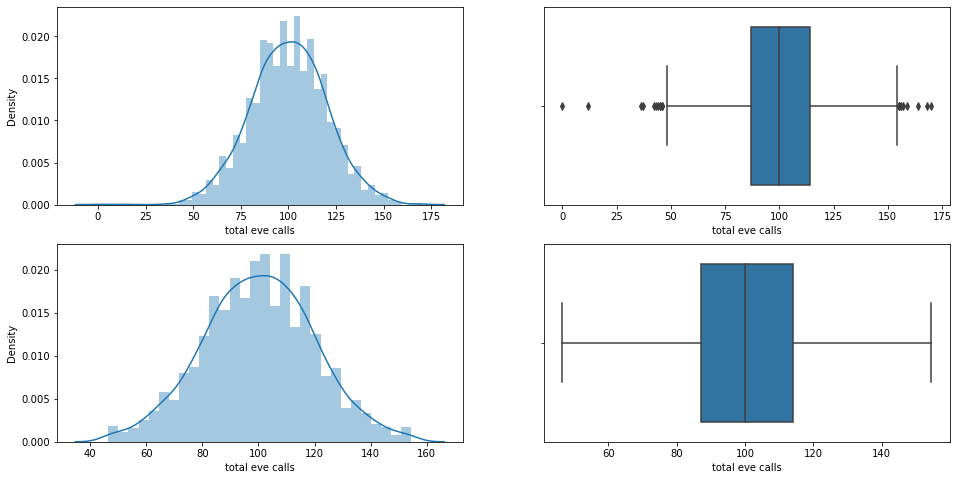

In [41]:
# for 'total eve calls'

percentile25 = tc['total eve calls'].quantile(0.25)
percentile75 = tc['total eve calls'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total eve calls'] > upper_limit
tc['total eve calls'] < lower_limit

#Trimming
new_tc = tc['total eve calls'] < upper_limit
new_tc.shape


# Capping the outlier

new_tc = tc.copy()
new_tc['total eve calls'] = np.where(
    new_tc['total eve calls'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['total eve calls'] < lower_limit,
        lower_limit,
        new_tc['total eve calls']
    )
)

#comparison plot of 'total day calls'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total eve calls'])
plt.subplot(2,2,2)
sns.boxplot(tc['total eve calls'])
plt.subplot(2,2,3)
sns.distplot(new_tc['total eve calls'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['total eve calls'])
plt.show()

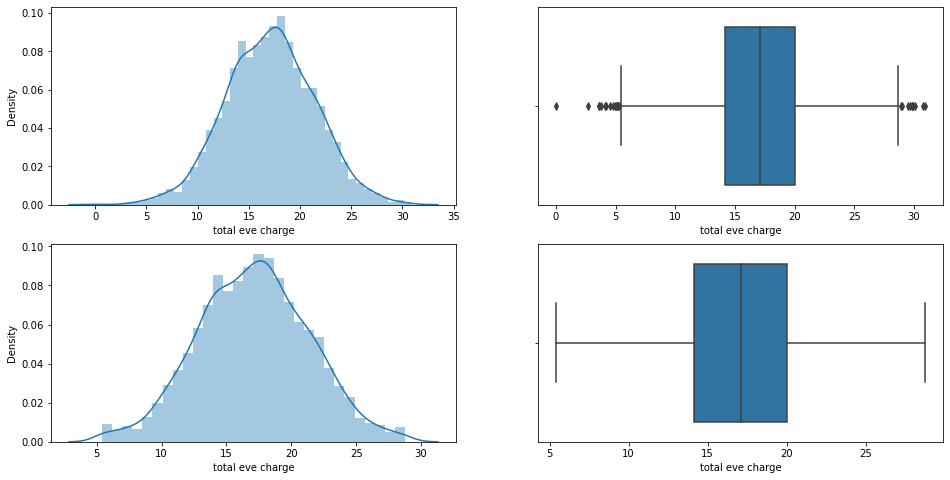

In [42]:
# for 'total eve charge'

percentile25 = tc['total eve charge'].quantile(0.25)
percentile75 = tc['total eve charge'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total eve charge'] > upper_limit
tc['total eve charge'] < lower_limit

#Trimming
tc2 = tc['total eve charge'] < upper_limit
tc2.shape

# Capping the outlier

tc2_cap = tc.copy()
tc2_cap['total eve charge'] = np.where(
    tc2_cap['total eve charge'] > upper_limit,
    upper_limit,
    np.where(
        tc2_cap['total eve charge'] < lower_limit,
        lower_limit,
        tc2_cap['total eve charge']
    )
)

#comparison plot of 'total eve charge'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total eve charge'])
plt.subplot(2,2,2)
sns.boxplot(tc['total eve charge'])
plt.subplot(2,2,3)
sns.distplot(tc2_cap['total eve charge'])
plt.subplot(2,2,4)
sns.boxplot(tc2_cap['total eve charge'])
plt.show()


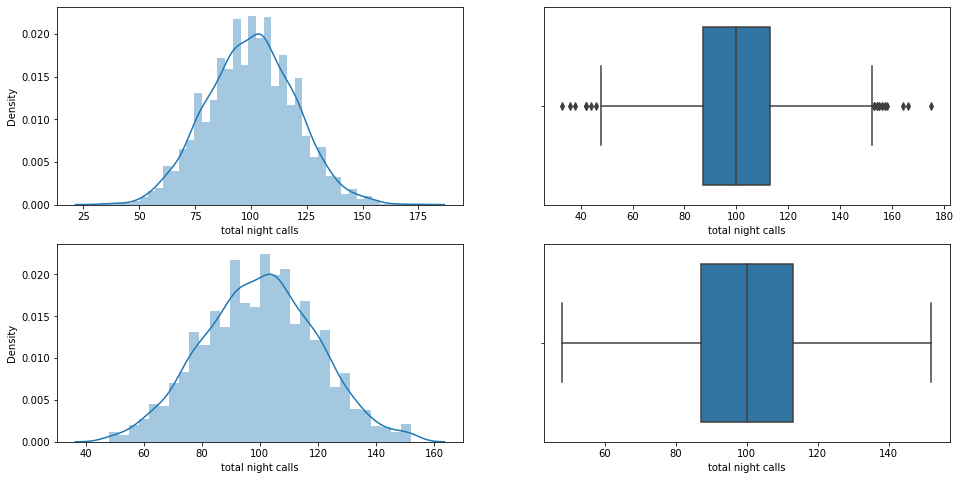

In [43]:
# for 'total night calls'

percentile25 = tc['total night calls'].quantile(0.25)
percentile75 = tc['total night calls'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total night calls'] > upper_limit
tc['total night calls'] < lower_limit

#Trimming
tc2 = tc['total night calls'] < upper_limit
tc2.shape

# Capping the outlier

tc2_cap = tc.copy()
tc2_cap['total night calls'] = np.where(
    tc2_cap['total night calls'] > upper_limit,
    upper_limit,
    np.where(
        tc2_cap['total night calls'] < lower_limit,
        lower_limit,
        tc2_cap['total night calls']
    )
)

#comparison plot of 'total night calls'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total night calls'])
plt.subplot(2,2,2)
sns.boxplot(tc['total night calls'])
plt.subplot(2,2,3)
sns.distplot(tc2_cap['total night calls'])
plt.subplot(2,2,4)
sns.boxplot(tc2_cap['total night calls'])
plt.show()

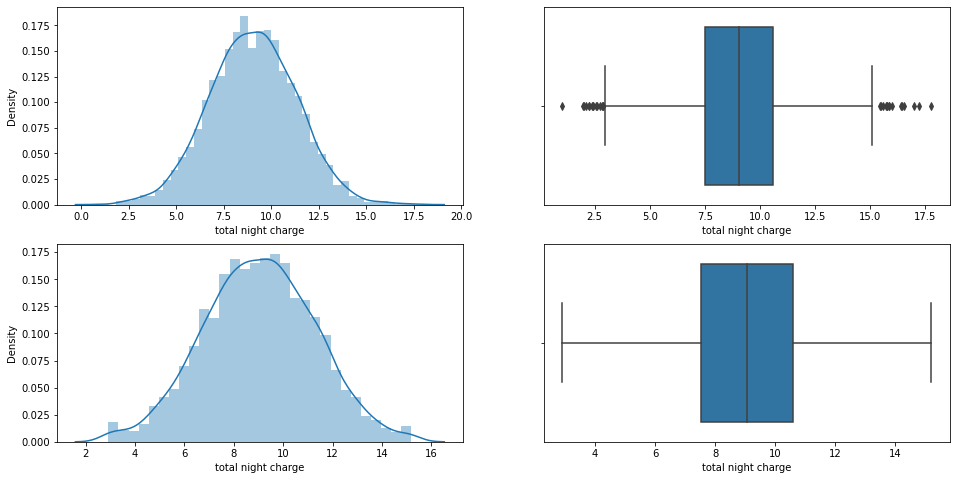

In [44]:
# for 'total night charge'

percentile25 = tc['total night charge'].quantile(0.25)
percentile75 = tc['total night charge'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total night charge'] > upper_limit
tc['total night charge'] < lower_limit

#Trimming
new_tc = tc['total night charge'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['total night charge'] = np.where(
    new_tc['total night charge'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['total night charge'] < lower_limit,
        lower_limit,
        new_tc['total night charge']
    )
)

#comparison plot of 'total night charge'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total night charge'])
plt.subplot(2,2,2)
sns.boxplot(tc['total night charge'])
plt.subplot(2,2,3)
sns.distplot(new_tc['total night charge'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['total night charge'])
plt.show()

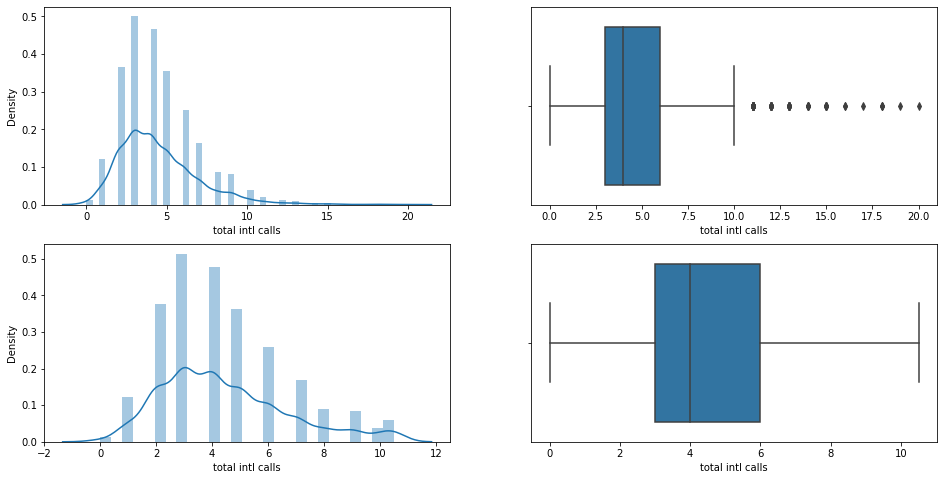

In [45]:
# for 'total intl calls'

percentile25 = tc['total intl calls'].quantile(0.25)
percentile75 = tc['total intl calls'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total intl calls'] > upper_limit
tc['total intl calls'] < lower_limit

#Trimming
new_tc = tc['total intl calls'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['total intl calls'] = np.where(
    new_tc['total intl calls'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['total intl calls'] < lower_limit,
        lower_limit,
        new_tc['total intl calls']
    )
)

#comparison plot of 'total intl calls'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total intl calls'])
plt.subplot(2,2,2)
sns.boxplot(tc['total intl calls'])
plt.subplot(2,2,3)
sns.distplot(new_tc['total intl calls'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['total intl calls'])
plt.show()

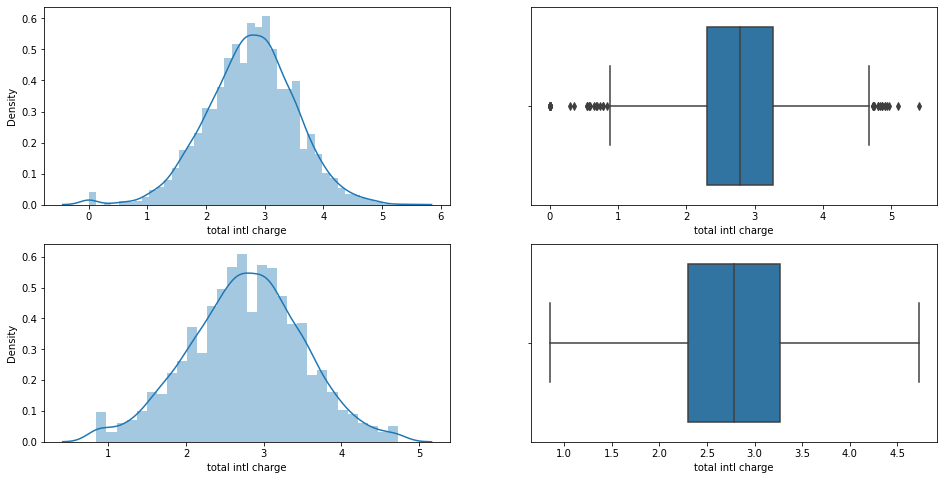

In [46]:
# for 'total intl charge'

percentile25 = tc['total intl charge'].quantile(0.25)
percentile75 = tc['total intl charge'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['total intl charge'] > upper_limit
tc['total intl charge'] < lower_limit

#Trimming
new_tc = tc['total intl charge'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['total intl charge'] = np.where(
    new_tc['total intl charge'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['total intl charge'] < lower_limit,
        lower_limit,
        new_tc['total intl charge']
    )
)

#comparison plot of 'total intl charge'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['total intl charge'])
plt.subplot(2,2,2)
sns.boxplot(tc['total intl charge'])
plt.subplot(2,2,3)
sns.distplot(new_tc['total intl charge'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['total intl charge'])
plt.show()


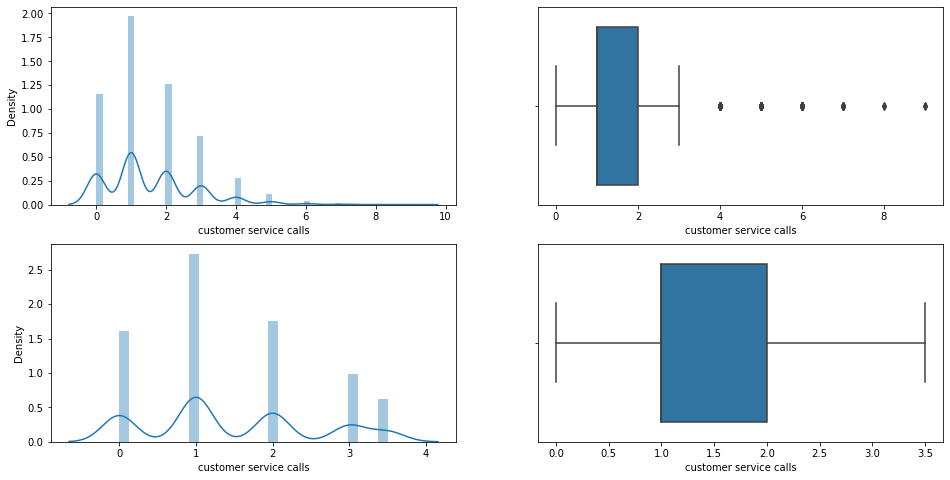

In [47]:
# for 'customer service calls'

percentile25 = tc['customer service calls'].quantile(0.25)
percentile75 = tc['customer service calls'].quantile(0.75)

upper_limit = percentile75 + 1.5 * (percentile75 - percentile25)
lower_limit = percentile25 - 1.5 * (percentile75 - percentile25)

# finding outlier
tc['customer service calls'] > upper_limit
tc['customer service calls'] < lower_limit

#Trimming
new_tc = tc['customer service calls'] < upper_limit
new_tc.shape

# Capping the outlier

new_tc = tc.copy()
new_tc['customer service calls'] = np.where(
    new_tc['customer service calls'] > upper_limit,
    upper_limit,
    np.where(
        new_tc['customer service calls'] < lower_limit,
        lower_limit,
        new_tc['customer service calls']
    )
)

#comparison plot of 'customer service calls'
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(tc['customer service calls'])
plt.subplot(2,2,2)
sns.boxplot(tc['customer service calls'])
plt.subplot(2,2,3)
sns.distplot(new_tc['customer service calls'])
plt.subplot(2,2,4)
sns.boxplot(new_tc['customer service calls'])
plt.show()

In [48]:
#As we already know that the data has sampling issue for couple of features 
# as well as the target(output) variable.

is_churn = new_tc['churn']=='True' #creating a filter where churn ='True'
y_true = new_tc.churn[is_churn]

In [49]:
label_encoder = preprocessing.LabelEncoder()

new_tc['state'] = label_encoder.fit_transform(new_tc['state'])
new_tc['international plan'] = label_encoder.fit_transform(new_tc['international plan'])
new_tc['voice mail plan'] = label_encoder.fit_transform(new_tc['voice mail plan'])

print (new_tc.dtypes)


state                       int32
account length              int64
area code                   int64
phone number               object
international plan          int32
voice mail plan             int32
number vmail messages     float64
total day calls           float64
total day charge          float64
total eve calls           float64
total eve charge          float64
total night calls         float64
total night charge        float64
total intl calls          float64
total intl charge         float64
customer service calls    float64
churn                        bool
dtype: object


In [50]:
# Here we donot require phone number, so we are dropping that column
new_tc = new_tc.drop(['phone number'], axis=1)


In [51]:
new_tc

state  account length  area code  international plan  voice mail plan  \
0        16             128        415                   0                1   
2117     50             111        415                   0                0   
2120     44              81        510                   0                0   
2121     47              46        510                   0                0   
2122     25              69        510                   0                1   
...     ...             ...        ...                 ...              ...   
1263     19              40        408                   0                1   
2119      4             111        408                   0                0   
340      10              89        415                   0                0   
2115      4             138        510                   1                0   
1204     14              78        415                   1                0   

      number vmail messages  total day calls  total day charge  \
0                      25.0            110.0             45.07   
2117                    0.0             96.0             37.77   
2120                    0.0             84.0             26.27   
2121                    0.0            108.0             15.37   
2122                   27.0             78.0             45.70   
...                     ...              ...               ...   
1263                   31.0             69.0             38.20   
2119                    0.0            109.0             42.47   
340                     0.0             63.0             36.21   
2115                    0.0            129.0             33.35   
1204                    0.0            141.0             40.26   

      total eve calls  total eve charge  total night calls  \
0                99.0             16.78               91.0   
2117            111.0             13.81              120.0   
2120             91.0             18.38               82.0   
2121             77.0             23.48              111.0   
2122             89.0             20.96              102.0   
...               ...               ...                ...   
1263             81.0             11.43              104.0   
2119            106.0             20.60               78.0   
340              71.0             15.01              126.0   
2115             86.0             15.00              108.0   
1204            101.0             22.55               77.0   

      total night charge  total intl calls  total intl charge  \
0                  11.01               3.0               2.70   
2117                8.32               7.0               3.21   
2120               10.34               3.0               3.70   
2121                6.59               2.0               3.43   
2122               12.24               3.0               4.43   
...                  ...               ...                ...   
1263                5.41               5.0               2.03   
2119               10.43               4.0               3.13   
340                11.82               1.0               2.46   
2115               10.46               1.0               4.10   
1204                6.86               2.0               2.57   

      customer service calls  churn  
0                        1.0  False  
2117                     3.5  False  
2120                     1.0  False  
2121                     1.0  False  
2122                     0.0  False  
...                      ...    ...  
1263                     1.0   True  
2119                     0.0   True  
340                      1.0   True  
2115                     0.0   True  
1204                     1.0   True  

[3333 rows x 16 columns]

In [52]:
new_tc.shape

(3333, 16)

In [53]:
bin_cols   = new_tc.nunique()[new_tc.nunique() == 2].keys().tolist()

le = LabelEncoder()
for i in bin_cols :
    new_tc[i] = le.fit_transform(new_tc[i])


In [54]:
#Let's separate out the output variable 'churn'

y = new_tc['churn']
y.size

3333

In [55]:
#Let's prepare the features (Data matrix)

X = new_tc.loc[:, new_tc.columns != 'churn']


In [56]:
X.columns

Index(['state', 'account length', 'area code', 'international plan',
       'voice mail plan', 'number vmail messages', 'total day calls',
       'total day charge', 'total eve calls', 'total eve charge',
       'total night calls', 'total night charge', 'total intl calls',
       'total intl charge', 'customer service calls'],
      dtype='object')

In [57]:
X.head()


state  account length  area code  international plan  voice mail plan  \
0        16             128        415                   0                1   
2117     50             111        415                   0                0   
2120     44              81        510                   0                0   
2121     47              46        510                   0                0   
2122     25              69        510                   0                1   

      number vmail messages  total day calls  total day charge  \
0                      25.0            110.0             45.07   
2117                    0.0             96.0             37.77   
2120                    0.0             84.0             26.27   
2121                    0.0            108.0             15.37   
2122                   27.0             78.0             45.70   

      total eve calls  total eve charge  total night calls  \
0                99.0             16.78               91.0   
2117            111.0             13.81              120.0   
2120             91.0             18.38               82.0   
2121             77.0             23.48              111.0   
2122             89.0             20.96              102.0   

      total night charge  total intl calls  total intl charge  \
0                  11.01               3.0               2.70   
2117                8.32               7.0               3.21   
2120               10.34               3.0               3.70   
2121                6.59               2.0               3.43   
2122               12.24               3.0               4.43   

      customer service calls  
0                        1.0  
2117                     3.5  
2120                     1.0  
2121                     1.0  
2122                     0.0

In [58]:
y.head()

0       0
2117    0
2120    0
2121    0
2122    0
Name: churn, dtype: int64

## Data Modelling part



In [59]:
# Let us split the dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [60]:
new_tc.isna()

state  account length  area code  international plan  voice mail plan  \
0     False           False      False               False            False   
2117  False           False      False               False            False   
2120  False           False      False               False            False   
2121  False           False      False               False            False   
2122  False           False      False               False            False   
...     ...             ...        ...                 ...              ...   
1263  False           False      False               False            False   
2119  False           False      False               False            False   
340   False           False      False               False            False   
2115  False           False      False               False            False   
1204  False           False      False               False            False   

      number vmail messages  total day calls  total day charge  \
0                     False            False             False   
2117                  False            False             False   
2120                  False            False             False   
2121                  False            False             False   
2122                  False            False             False   
...                     ...              ...               ...   
1263                  False            False             False   
2119                  False            False             False   
340                   False            False             False   
2115                  False            False             False   
1204                  False            False             False   

      total eve calls  total eve charge  total night calls  \
0               False             False              False   
2117            False             False              False   
2120            False             False              False   
2121            False             False              False   
2122            False             False              False   
...               ...               ...                ...   
1263            False             False              False   
2119            False             False              False   
340             False             False              False   
2115            False             False              False   
1204            False             False              False   

      total night charge  total intl calls  total intl charge  \
0                  False             False              False   
2117               False             False              False   
2120               False             False              False   
2121               False             False              False   
2122               False             False              False   
...                  ...               ...                ...   
1263               False             False              False   
2119               False             False              False   
340                False             False              False   
2115               False             False              False   
1204               False             False              False   

      customer service calls  churn  
0                      False  False  
2117                   False  False  
2120                   False  False  
2121                   False  False  
2122                   False  False  
...                      ...    ...  
1263                   False  False  
2119                   False  False  
340                    False  False  
2115                   False  False  
1204                   False  False  

[3333 rows x 16 columns]

In [61]:
X_train.shape

(2333, 15)

In [62]:

y_train.shape


(2333,)

In [63]:
X_test.shape

(1000, 15)

In [64]:
y_test.shape

(1000,)

# Model Building Part

# Performing logistic regression model

In [65]:
# Representing LinearRegression as lr(Creating LinearRegression Object)
lr = LogisticRegression()

In [66]:
#fit the model to the training data
lr.fit(X_train, y_train)


LogisticRegression()

In [67]:
#Prediction of model
y_pred = lr.predict(X_test)

# LR Model evaluation

In [68]:
type(y_pred)

numpy.ndarray

In [69]:
type(y_test)

pandas.core.series.Series

In [70]:
# Now checking Coefficient Values thorugh column Name 

tc_coef = pd.DataFrame(columns = ['ColumnName', 'Coefficient_value'])
tc_coef['ColumnName'] = X.columns
tc_coef['Coefficient_value'] = lr.coef_[0]
tc_coef

ColumnName  Coefficient_value
0                    state          -0.000730
1           account length          -0.000989
2                area code          -0.008257
3       international plan           0.145105
4          voice mail plan          -0.017471
5    number vmail messages          -0.020925
6          total day calls          -0.003356
7         total day charge           0.058914
8          total eve calls          -0.004284
9         total eve charge           0.033864
10       total night calls          -0.002044
11      total night charge           0.065702
12        total intl calls          -0.164081
13       total intl charge           0.063276
14  customer service calls           0.295483

In [71]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[849,   2],
       [141,   8]], dtype=int64)

In [72]:
# IN THE FIRST ROW of the CONFUSION MATRIX
# 849 are not churn and my code correctly predicted no churn. (TRUE NEGATIVES)
# 2 were WRONGLY classified as no churn (Also known as FALSE POSITIVES)


# IN THE SECOND ROW of the Confusion Matrix.
# 8 were Churn and my code correctly identified Churn. (TRUE POSITIVES)
# 141 were not churn but was classified as CHURN. (Also known as FALSE NEGATIVES)

<AxesSubplot:>

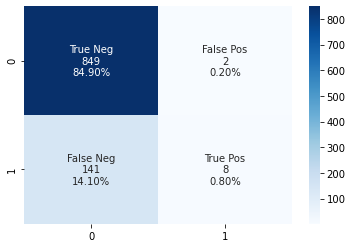

In [74]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [75]:
#Checking accuracy, recall, Precision, AUC ROC and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [76]:
print('Accuracy of lr model is  :' , accuracy)
print('F1 score of lr model is :' , f1)
print('Precision of lr model is  :', precision)
print('Recall of lr model is  :' , recall)
print('Roc Auc of lr model is  :' , roc_auc)

Accuracy of lr model is  : 0.857
F1 score of lr model is : 0.10062893081761007
Precision of lr model is  : 0.8
Recall of lr model is  : 0.053691275167785234
Roc Auc of lr model is  : 0.5256705494522828


# Decision Tree Model

In [77]:
# Decision tree model
dt = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
dt.fit(X_train,y_train)

print("Decision Tree Created")

Decision Tree Created


In [78]:
# Predicting the values of test data
y_pred = dt.predict(X_test)

Decision tree model evaluation



In [79]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[803,  48],
       [ 39, 110]], dtype=int64)

In [80]:
# IN THE FIRST ROW of the CONFUSION MATRIX
# 803 are not churn and my code correctly predicted no churn. (TRUE NEGATIVES)
# 48 were WRONGLY classified as no churn (Also known as FALSE POSITIVES)


# IN THE SECOND ROW of the Confusion Matrix.
# 110 were Churn and my code correctly identified Churn. (TRUE POSITIVES)
# 39 were not churn but was classified as CHURN. (Also known as FALSE NEGATIVES)

<AxesSubplot:>

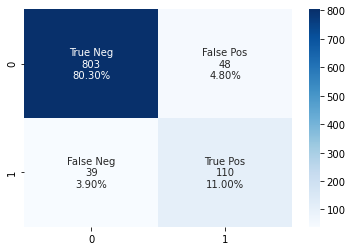

In [81]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [82]:
#Checking accuracy, recall, Precision, AUC ROC and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [83]:
print('Accuracy of Decision Tree model is  :' , accuracy)
print('F1 score of Decision Tree model is :' , f1)
print('Precision of Decision Tree model is  :', precision)
print('Recall of Decision Tree model is  :' , recall)
print('Roc Auc of Decision Tree model is  :' , roc_auc)

Accuracy of Decision Tree model is  : 0.913
F1 score of Decision Tree model is : 0.7166123778501629
Precision of Decision Tree model is  : 0.6962025316455697
Recall of Decision Tree model is  : 0.738255033557047
Roc Auc of Decision Tree model is  : 0.8409254016198866


# Random forest model

In [84]:
#build a classifier
rf = RandomForestClassifier()

#Train the model using the training sets
rf.fit(X_train, y_train)

print("Random Forest Model Created")

Random Forest Model Created


In [85]:
#Predict the response for test dataset
y_pred = rf.predict(X_test)

In [86]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[845,   6],
       [ 49, 100]], dtype=int64)

In [87]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [88]:
# IN THE FIRST ROW of the CONFUSION MATRIX
# 844 are not churn and my code correctly predicted no churn. (TRUE NEGATIVES)
# 7 were WRONGLY classified as no churn (Also known as FALSE POSITIVES)


# IN THE SECOND ROW of the Confusion Matrix.
# 93 were Churn and my code correctly identified Churn. (TRUE POSITIVES)
# 56 were not churn but was classified as CHURN. (Also known as FALSE NEGATIVES)

<AxesSubplot:>

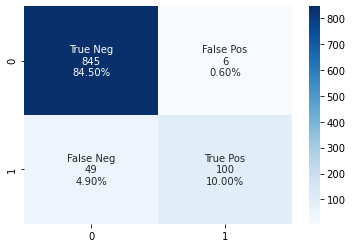

In [89]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [90]:
#Checking accuracy, recall, Precision, AUC ROC and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [91]:
print('Accuracy of Random forest model is  :' , accuracy)
print('F1 score of Random forest model is :' , f1)
print('Precision of Random forest model is  :', precision)
print('Recall of Random forest model is  :' , recall)
print('Roc Auc of Random forest model is  :' , roc_auc)

Accuracy of Random forest model is  : 0.945
F1 score of Random forest model is : 0.784313725490196
Precision of Random forest model is  : 0.9433962264150944
Recall of Random forest model is  : 0.6711409395973155
Roc Auc of Random forest model is  : 0.8320452054038281


# Gradient boost model

In [92]:
#build a classifier
gb = GradientBoostingClassifier()

#fit the model
gb.fit(X_train, y_train)

print("Gradient Boosting Model Created")

Gradient Boosting Model Created


In [93]:
#Predict the response for test dataset
y_pred = gb.predict(X_test)

Gradient Boosting model evaluation

In [94]:
# Confusion matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[841,  10],
       [ 38, 111]], dtype=int64)

In [95]:
from sklearn.ensemble import GradientBoostingClassifier

In [96]:
# IN THE FIRST ROW of the CONFUSION MATRIX
# 841 are not churn and my code correctly predicted no churn. (TRUE NEGATIVES)
# 10 were WRONGLY classified as no churn (Also known as FALSE POSITIVES)


# IN THE SECOND ROW of the Confusion Matrix.
# 111 were Churn and my code correctly identified Churn. (TRUE POSITIVES)
# 38 were not churn but was classified as CHURN. (Also known as FALSE NEGATIVES)

<AxesSubplot:>

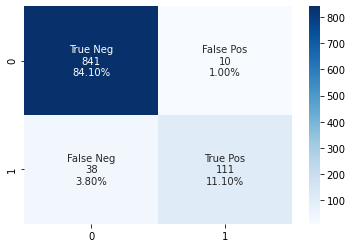

In [97]:
# confusion matrix plot
group_names = ['True Neg','False Pos','False Neg','True Pos']

group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm, annot=labels, fmt='', cmap='Blues')

In [98]:
#Checking accuracy, recall, Precision, AUC ROC and F1 score of the model
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

In [99]:
print('Accuracy of Gradient Boosting model is  :' , accuracy)
print('F1 score of Gradient Boosting model is :' , f1)
print('Precision of Gradient Boosting model is  :', precision)
print('Recall of Gradient Boosting model is  :' , recall)
print('Roc Auc of Gradient Boosting model is  :' , roc_auc)

Accuracy of Gradient Boosting model is  : 0.952
F1 score of Gradient Boosting model is : 0.8222222222222223
Precision of Gradient Boosting model is  : 0.9173553719008265
Recall of Gradient Boosting model is  : 0.7449664429530202
Roc Auc of Gradient Boosting model is  : 0.8666077808184608


we can see that the accuracy, recall, roc-auc of the gradient boosting model is the highest but the precision of this model is slightly lower than random forest model. Therefore, Gradient Boost model is best among all the models